In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['patch.linewidth'] = 2
%matplotlib inline
import numpy as np

In [2]:
from read_dataset import *

In [3]:
# change the paths here!
data = {}
data['ee'] = read_dataset('data/MonteCarlo/ee.csv')
data['mm'] = read_dataset('data/MonteCarlo/mm.csv')
data['tt'] = read_dataset('data/MonteCarlo/tt.csv')
data['qq'] = read_dataset('data/MonteCarlo/qq.csv')

In [4]:
# make sure you understand the layout of the files
print(data['ee'][0])

[ 1.30800000e+03  1.00000000e+00  2.00000000e+00  8.13279419e+01
  8.89296188e+01  0.00000000e+00  4.56389999e+01  9.99000000e+02
 -8.55788708e-01]


In [5]:
for channel in ['ee', 'mm', 'tt', 'qq']:
    print(channel, len(data[channel]))

ee 93802
mm 94381
tt 79214
qq 98563


In [6]:
data['mm'][:,4]

array([28.66976166,  6.56520796,  1.10464454, ...,  3.09396005,
        1.54154265,  1.85029745])

In [7]:
ind = {}
ind['run'] = 0
ind['event'] = 1
ind['Ncharged'] = 2
ind['Pcharged'] = 3
ind['E_ecal'] = 4
ind['E_hcal'] = 5
ind['E_lep'] = 6
ind['cos_thru'] = 7
ind['cos_thet'] = 8

# Final plots

In [8]:
# Plot N_CHARGED
name = "Ncharged"
i = ind[name]
opts = {'alpha': 0.5, 'histtype': 'stepfilled', 'bins': 48}

plt.hist((data['ee'][:,i],data['mm'][:,i], data['tt'][:,i], data['qq'][:,i]), label=("ee", "mm", "tt", "qq"), **opts)
plt.xlim(0, 50)
plt.yscale('log')
plt.xlabel('$' + 'N_{charged}' + '$', fontsize=15)
plt.ylabel('Anzahl Ereignisse', fontsize=15)
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "_all" + ".pdf",dpi=100, bbox_inches="tight")
plt.savefig("plots/" + "2_hist_" + name + "_all" + ".png",dpi=100, bbox_inches="tight")
plt.close()

In [9]:
# Plot P_CHARGED
name = "Pcharged"
i = ind[name]
opts = {'alpha': 0.5, 'histtype': 'stepfilled', 'bins': 500000}

plt.hist((data['ee'][:,i],data['mm'][:,i], data['tt'][:,i], data['qq'][:,i]), label=("ee", "mm", "tt", "qq"), **opts)
plt.xlim(0, 130)
plt.yscale('log')
plt.xlabel('$' + 'P_{charged}$ $' + '[GeV]$', fontsize=15)
plt.ylabel('Anzahl Ereignisse', fontsize=15)
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "_all" + ".pdf",dpi=100, bbox_inches="tight")
plt.savefig("plots/" + "2_hist_" + name + "_all" + ".png",dpi=100, bbox_inches="tight")
plt.close()

In [10]:
# Plot E_ECAL
name = "E_ecal"
i = ind[name]
opts = {'alpha': 0.5, 'histtype': 'stepfilled', 'bins': 110}

plt.hist((data['ee'][:,i],data['mm'][:,i], data['tt'][:,i], data['qq'][:,i]), label=("ee", "mm", "tt", "qq"), **opts)
plt.xlim(0, 110)
plt.yscale('log')
plt.xlabel('$' + 'E_{ECAL}$ $' + '[GeV]$', fontsize=15)
plt.ylabel('Anzahl Ereignisse', fontsize=15)
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "_all" + ".pdf",dpi=100, bbox_inches="tight")
plt.savefig("plots/" + "2_hist_" + name + "_all" + ".png",dpi=100, bbox_inches="tight")
plt.close()

In [11]:
# Plot E_HCAL
name = "E_hcal"
i = ind[name]
opts = {'alpha': 0.5, 'histtype': 'stepfilled', 'bins': 80}

plt.hist((data['ee'][:,i],data['mm'][:,i], data['tt'][:,i], data['qq'][:,i]), label=("ee", "mm", "tt", "qq"), **opts)
plt.xlim(0, 80)
plt.yscale('log')
plt.xlabel('$' + 'E_{HCAL}$ $' + '[GeV]$', fontsize=15)
plt.ylabel('Anzahl Ereignisse', fontsize=15)
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "_all" + ".pdf",dpi=100, bbox_inches="tight")
plt.savefig("plots/" + "2_hist_" + name + "_all" + ".png",dpi=100, bbox_inches="tight")
plt.close()

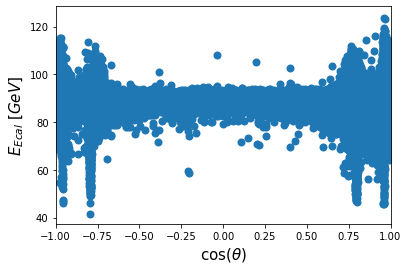

In [12]:
# make scatter plot E_ecal vs cos_theta for ee events!
plt.scatter(data['ee'][:,ind['cos_thet']], data['ee'][:,ind['E_ecal']])
plt.ylabel('$E_{Ecal}$ $[GeV]$', fontsize=15)
plt.xlabel('$\cos(θ)$', fontsize=15)
plt.xlim(-1, 1)
plt.savefig("plots/" + "2_scatter_" + 'cos_thet_E' + ".pdf",dpi=300, bbox_inches="tight")
plt.savefig("plots/" + "2_scatter_" + 'cos_thet_E' + ".png",dpi=100, bbox_inches="tight")

In [ ]:
# Plots for testing purposes

In [13]:
# some histogramming examples
# don't forget to add labels!

opts = {'alpha': 0.5, 'bins': 20}

for index, name in enumerate(ind):
    plt.hist(data['ee'][:,index], label="ee", **opts)
    plt.hist(data['mm'][:,index], label="mm", **opts)
    plt.hist(data['tt'][:,index], label="tt", **opts)
    plt.hist(data['qq'][:,index], label="qq", **opts)
    plt.xlabel(name)
    plt.ylabel('Anzahl Ereignisse')
    plt.legend()
    plt.savefig("plots/" + "2_hist_" + name + ".pdf",dpi=900, bbox_inches="tight")
    plt.close()

In [14]:
# Plot hcal_e
name = "E_hcal"
i = ind[name]
opts = {'histtype': 'step', 'bins': 50}

to_draw = (data['ee'][:,i],data['mm'][:,i],data['tt'][:,i],data['qq'][:,i])
to_draw = [list(filter(lambda x: x<60, td)) for td in to_draw]

plt.hist(to_draw, label=("ee", "mm", "tt", "qq"), **opts)
plt.xlabel(name)
plt.ylabel('Anzahl Ereignisse')
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "_sliced" + ".pdf",dpi=900, bbox_inches="tight")
plt.close()

In [15]:
# Plot hcal_e (log)
name = "E_hcal"
i = ind[name]
opts = {'histtype': 'step', 'bins': 50, 'log': True}

to_draw = (data['ee'][:,i],data['mm'][:,i],data['tt'][:,i],data['qq'][:,i])
to_draw = [list(filter(lambda x: x<60, td)) for td in to_draw]

plt.hist(to_draw, label=("ee", "mm", "tt", "qq"), **opts)
plt.xlabel(name)
plt.ylabel('Anzahl Ereignisse')
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "_log_sliced" + ".pdf",dpi=900, bbox_inches="tight")
plt.close()

In [16]:
# Plot p_charged for ee and tt
name = "Pcharged"
i = ind[name]
opts = {'histtype': 'step', 'bins': 50000, 'log': True}

plt.hist(data['ee'][:,i], label="ee", **opts)
#plt.hist(data['mm'][:,i], label="mm", **opts)
plt.hist(data['tt'][:,i], label="tt", **opts)
#plt.hist(data['qq'][:,i], label="qq", **opts)
plt.xlabel(name)
plt.ylabel('Anzahl Ereignisse')
plt.xlim(0, 5e3) 
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "_sliced" + ".pdf",dpi=900, bbox_inches="tight")
plt.close()

In [17]:
# Plot p_charged
name = "Pcharged"
i = ind[name]
opts = {'histtype': 'step', 'bins': 50000, 'log': True}

plt.hist(data['ee'][:,i], label="ee", **opts)
plt.hist(data['mm'][:,i], label="mm", **opts)
plt.hist(data['tt'][:,i], label="tt", **opts)
plt.hist(data['qq'][:,i], label="qq", **opts)
plt.xlabel(name)
plt.ylabel('Anzahl Ereignisse')
plt.xlim(0, 3e2) 
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "_sliced" + ".pdf",dpi=900, bbox_inches="tight")
plt.close()

In [18]:
# Plot p_charged for mm and tt
name = "Pcharged"
i = ind[name]
opts = {'histtype': 'step', 'bins': 50000, 'log': True}

#plt.hist(data['ee'][:,i], label="ee", **opts)
plt.hist(data['mm'][:,i], label="mm", **opts)
plt.hist(data['tt'][:,i], label="tt", **opts)
#plt.hist(data['qq'][:,i], label="qq", **opts)
plt.xlabel(name)
plt.ylabel('Anzahl Ereignisse')
plt.xlim(0, 3e2) 
plt.legend()
plt.savefig("plots/" + "2_hist_" + name + "mm_tt_sliced" + ".pdf",dpi=900, bbox_inches="tight")
plt.close()

In [19]:
# logarithmic
opts = {'alpha': 0.5, 'bins': 20, 'log': True}

for index, name in enumerate(ind):
    plt.hist(data['ee'][:,index], label="ee", **opts)
    plt.hist(data['mm'][:,index], label="mm", **opts)
    plt.hist(data['tt'][:,index], label="tt", **opts)
    plt.hist(data['qq'][:,index], label="qq", **opts)
    plt.xlabel(name)
    plt.ylabel('Anzahl Ereignisse')
    plt.legend()
    plt.savefig("plots/" + "2_hist_log" + name + ".pdf",dpi=900, bbox_inches="tight")
    plt.close()

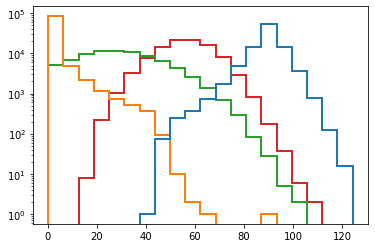

In [20]:
# same binning; not filled
opts = {'histtype': 'step', 'bins': 20, 'log': True}
i = ind['E_ecal']
to_draw = (data['ee'][:,i], data['mm'][:,i], data['tt'][:,i], data['qq'][:,i])
plt.hist(to_draw, **opts);

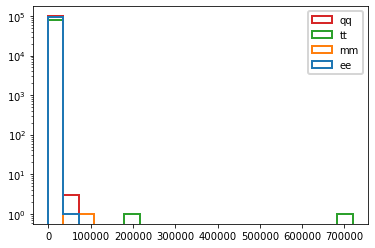

In [21]:
# same binning; not filled
opts = {'histtype': 'step', 'bins': 20, 'log': True}
i = ind['Pcharged']
to_draw = (data['ee'][:,i], data['mm'][:,i], data['tt'][:,i], data['qq'][:,i])

plt.hist(to_draw, **opts, label=('ee','mm','tt','qq'));
plt.legend();

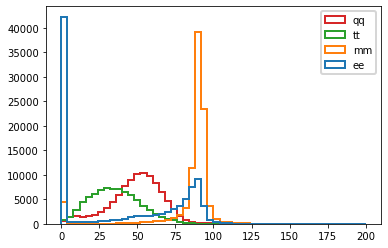

In [22]:
# filtering the lists:
opts = {'histtype': 'step', 'log': False, 'bins': 50}
i = ind['Pcharged']
to_draw = (data['ee'][:,i],data['mm'][:,i],data['tt'][:,i],data['qq'][:,i])
to_draw = [list(filter(lambda x: x<200, td)) for td in to_draw]
plt.hist(to_draw, label=('ee','mm','tt','qq'), **opts);
plt.legend();

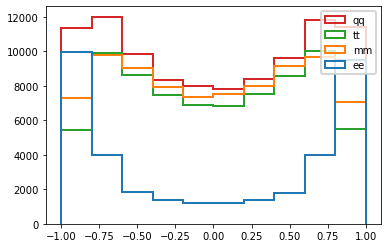

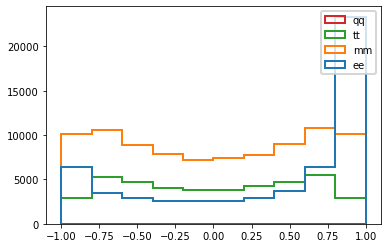

In [23]:
# filtering the lists: -1 < cos_theta < 1
opts = {'histtype': 'step'}
for var in ('cos_thru', 'cos_thet'):
    i = ind[var]
    #plt.show()
    plt.hist((list(filter(lambda x: abs(x)<=1, data['ee'][:,i])),
              list(filter(lambda x: abs(x)<=1, data['mm'][:,i])),
              list(filter(lambda x: abs(x)<=1, data['tt'][:,i])),
              list(filter(lambda x: abs(x)<=1, data['qq'][:,i]))),
             label=('ee','mm','tt','qq'), **opts);
    plt.legend()
    plt.show()

(-1.0, 1.0)

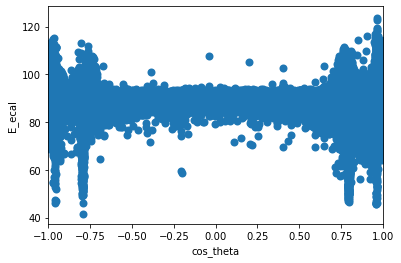

In [24]:
# make scatter plot E_ecal vs cos_theta for ee events!
plt.scatter(data['ee'][:,ind['cos_thet']], data['ee'][:,ind['E_ecal']])
plt.ylabel('E_ecal')
plt.xlabel('cos_theta')
plt.xlim(-1, 1) 

In [25]:
# Histogram for cos_thet (filtered |cos_thet| <= 1)
opts = {'histtype': 'step'}
for var in ('cos_thru', 'cos_thet'):
    i = ind[var]
    #plt.show()
    plt.hist((list(filter(lambda x: abs(x)<=1, data['ee'][:,i])),
              list(filter(lambda x: abs(x)<=1, data['mm'][:,i])),
              list(filter(lambda x: abs(x)<=1, data['tt'][:,i])),
              list(filter(lambda x: abs(x)<=1, data['qq'][:,i]))),
             label=('ee','mm','tt','qq'), **opts);
    plt.legend()
    plt.savefig("plots/" + "2_hist_" + var + ".pdf",dpi=900, bbox_inches="tight")
    plt.close()